(60000,)
Train accuracy: 0.9437833333333333
Test accuracy: 0.9304


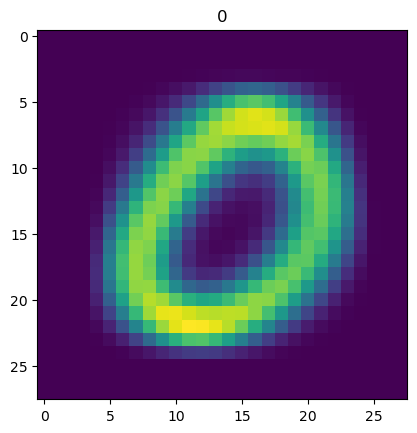

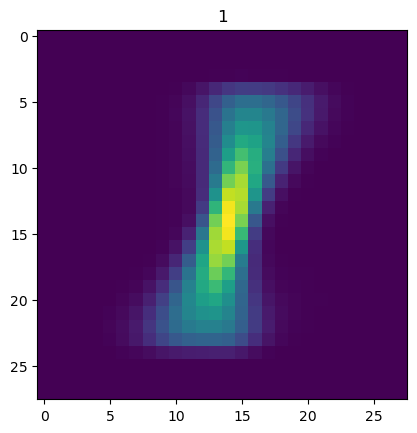

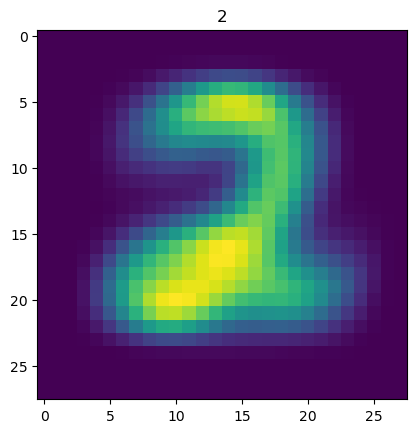

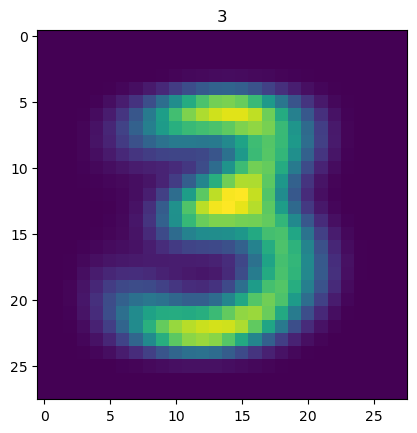

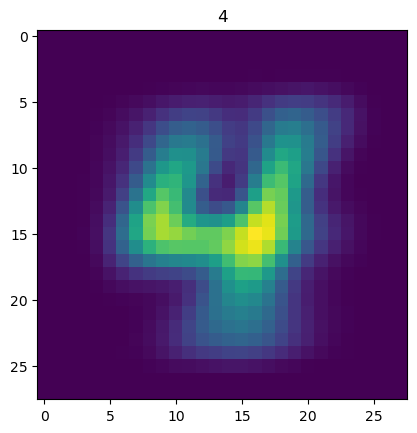

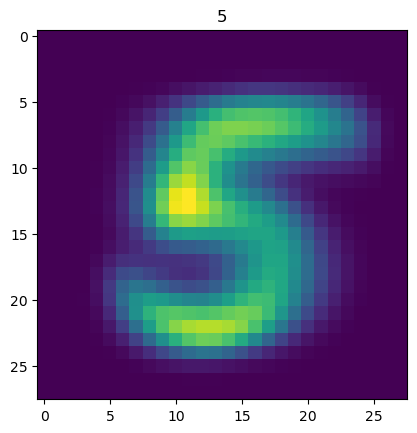

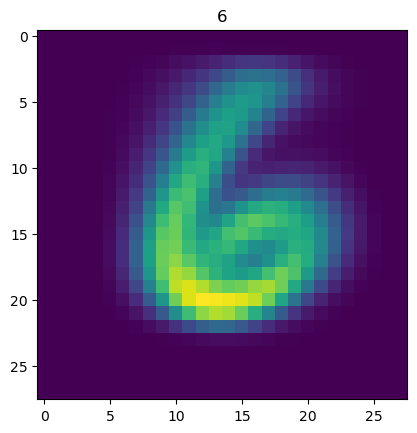

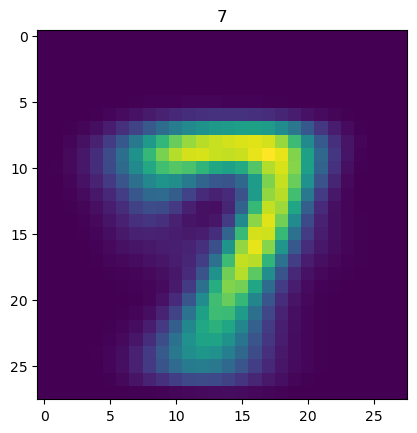

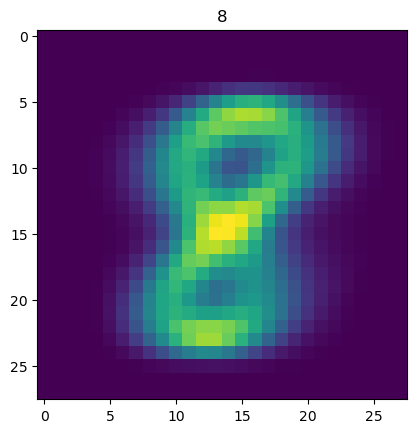

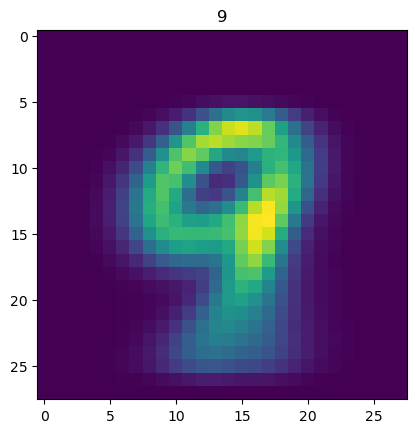

In [1]:
# Bayes Classification Code for MNIST Dataset.
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from keras.datasets import mnist
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
 
class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):  # X is data matrix, Y is label vector.
        # N number of rows (no. of examples) and D is data/feature dimension (784).
        N, D = X.shape
        self.gaussians = dict()  # dict() is a dynamic structure in Python.
        self.priors = dict()
        labels = set(
            Y
        )  # set(.) takes unique values in class label vector Y. You can also use np.unique.
        for c in labels:  # loop for each class (from 0 to 9).
            current_x = X[
                Y == c
            ]  # Collect from total X, all those examples (rows) which have label c.
            self.gaussians[c] = {
                "mean": current_x.mean(
                    axis=0
                ),  # find column wise (axis=0) mean. Mean vector will be [1x784] having mean of each column (feature).
                "cov": np.cov(current_x.T)
                + np.eye(D)
                * smoothing,  # find covariance matrix. Covariance matric will be [784x784].
            }
            self.priors[c] = float(len(Y[Y == c])) / len(
                Y
            )  # Priors are simple class probabilities P(C) and are equal to (# of examples of class c / total # of examples). example and total count can be found in label vector Y.

    def score(self, X, Y):  # A function to calculate accuracy.
        P = self.predict(X)  # First calling predict function which is defined later.
        return np.mean(
            P == Y
        )  # Calculating mean of prediction (P) for each class in Y.

    # def predict(self, X):
    #     N, D = X.shape
    #     K = len(self.gaussians)
    #     P = np.zeros((N, K))
    #     for c, g in iteritems(self.gaussians):
    #         mean, cov = g['mean'], g['cov']
    #         P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
    #     return np.argmax(P, axis=1)

    def predict(self, X):  # Main classifier predictor function.
        N, D = X.shape
        K = len(self.gaussians)
        log_P = np.zeros((N, K))
        for c, g in self.gaussians.items():  # c iterated fromn [0 - 9] for each class.
            mean, cov = g["mean"], g["cov"]
            cov += (
                np.eye(D) * 1e-6
            )  # Adding a small number to ensure all elements are non-zero.
            cov_inv = np.linalg.inv(
                cov
            )  # linear algebra function for finding inverse of covariance matrix.
            det_cov = np.linalg.det(
                cov
            )  # linear algebra function to find determinant of matrix.
            log_prior = np.log(self.priors[c])  # Taking log of class priors.
            for i in range(N):  # For each example in data X (train or test).
                x = X[i]
                diff = (
                    x - mean
                )  # These few line find the log of P(x|C) uisng Gaussian/Normal distribution. Log is taken to make computation easy on processor.
                log_exponent = -0.5 * diff.dot(cov_inv).dot(diff)
                log_likelihood = (
                    log_exponent
                    - 0.5 * D * np.log(2 * np.pi)
                    - 0.5 * np.log(np.abs(det_cov) + 1e-6)
                )  # Adding a small value to avoid division by zero.
                log_P[i, c] = (
                    log_likelihood + log_prior
                )  # class wise posteriors i.e., P(C|x)=P(x|C)P(C)----->log(P(C|x)=P(x|C)P(C)) = log(P(x|C))+log(P(C)).
        return np.argmax(log_P, axis=1)


# Load the MNIST dataset
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()
print(Ytrain.shape)
# Flatten the images
Xtrain = Xtrain.reshape(Xtrain.shape[0], -1)
Xtest = Xtest.reshape(Xtest.shape[0], -1)

# Normalize the pixel values to be between 0 and 1
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

# Create the model and fit it to the training data
model = Bayes()
model.fit(Xtrain, Ytrain)

# Compute and print the train and test accuracies
print("Train accuracy:", model.score(Xtrain, Ytrain))
print("Test accuracy:", model.score(Xtest, Ytest))

# Plot the mean of each class (optional)
for c, g in model.gaussians.items():
    plt.imshow(g["mean"].reshape(28, 28))
    plt.title(c)
    plt.show()

-0.8028035621561337


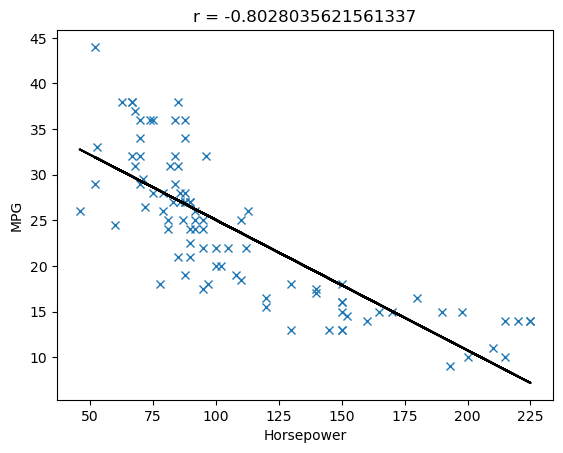

In [2]:
# Linear Regression Code
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat("cardata.mat")
# Select data based on the 'isdata' mask
y = mat["MPG"]
x = mat["Horsepower"]
valid_data = ~np.isnan(x) & ~np.isnan(y)
x = x[valid_data]
y = y[valid_data]
# Scatterplot
plt.plot(x, y, "x")
plt.xlabel("Horsepower")
plt.ylabel("MPG")

# Calculate the correlation coefficient (Pearson's r)
r = np.corrcoef(x, y)[0, 1]
print(r)
# Add correlation coefficient to the scatterplot
plt.title(f"r = {r}")

# Calculate regression line parameters
xbar = np.mean(x)
ybar = np.mean(y)
sigx = np.std(x)
sigy = np.std(y)
a1 = r * sigy / sigx  # Regression line slope

# Calculate the regression line
yfit = ybar + a1 * (x - xbar)

# Overplot the regression line
plt.plot(x, yfit, "k-")

plt.show()

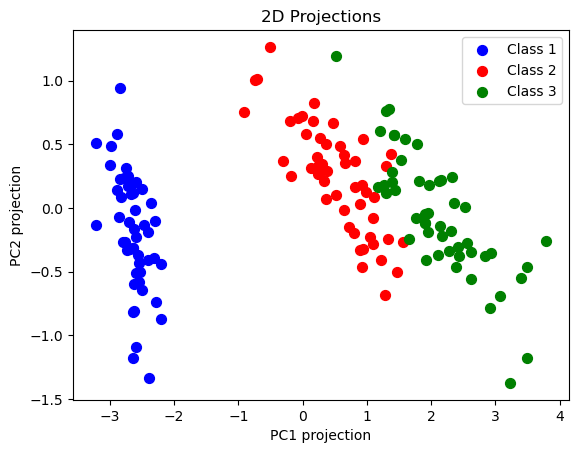

In [3]:
# PCA Code
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Step 1: Load the data
iris_data = scipy.io.loadmat('iris_data.mat')
X = iris_data['iris'][:, :4]
L = iris_data['iris'][:, -1]
nd = 3  # New Dimension

# Center the data
Xmean = np.mean(X, axis=0) # Column-wise mean
X = X - Xmean

# Step 3: Calculate the covariance matrix
covariance_matrix = np.cov(X, rowvar=False)

# Step 4: Finding Eigenvectors
D, V = np.linalg.eig(covariance_matrix)
D = np.real(D) # Diagonal elements
ind = np.argsort(D)[::-1] # Descending order sorting indexes
D = D[ind] # Rearrange
V = V[:, ind] # Rearrange
P = V[:, :nd]  # Column-wise principal components

# Step 5: Deriving the new data set
Xnew = X.dot(P)  # [N x d] x [d x nd] = [N x nd] matrix
Xnew1 = Xnew[:, 0]
Xnew2 = Xnew[:, 1]

# Scatterplot
plt.figure()
plt.scatter(Xnew1[L == 1], Xnew2[L == 1], c='b', s=50, label='Class 1')
plt.scatter(Xnew1[L == 2], Xnew2[L == 2], c='r', s=50, label='Class 2')
plt.scatter(Xnew1[L == 3], Xnew2[L == 3], c='g', s=50, label='Class 3')
plt.title('2D Projections')
plt.xlabel('PC1 projection')
plt.ylabel('PC2 projection')
plt.legend()
plt.show()

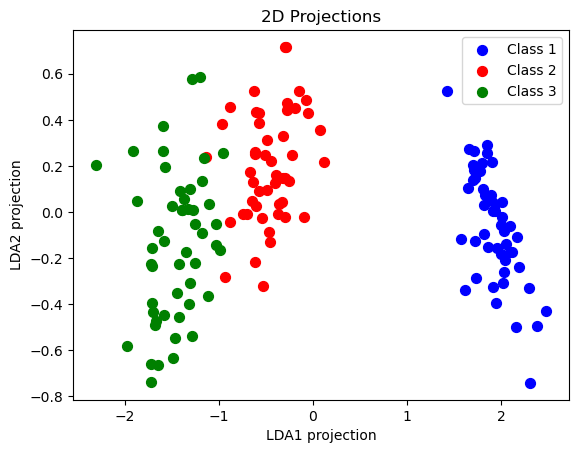

In [4]:
# LDA Code
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Load the data
iris_data = scipy.io.loadmat('iris_data.mat')
X = iris_data['iris'][:, :4]
L = iris_data['iris'][:, -1]

# Linear Discriminant Analysis (LDA) function
def LDA_func(X, L):
    Classes = np.unique(L)
    k = len(Classes)
    n = np.zeros(k)
    C = []
    M = np.mean(X, axis=0)  # Overall mean
    S = []
    Sw = np.zeros((X.shape[1], X.shape[1]))
    Sb = np.zeros((X.shape[1], X.shape[1]))

    for j in range(k):
        Xj = X[L == Classes[j]]
        n[j] = Xj.shape[0]  # Class sample size
        Cj = np.mean(Xj, axis=0)  # Class mean
        C.append(Cj)
        Sj = np.zeros((X.shape[1], X.shape[1]))
        for i in range(int(n[j])):
            diff = Xj[i] - Cj
            Sj += np.outer(diff, diff)
        S.append(Sj)
        Sw += Sj
        Sb += n[j] * np.outer(Cj - M, Cj - M)

    # Corrected version
    D, V = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    D = np.real(D)
    ind = np.argsort(D)[::-1]
    V = V[:, ind]
    W = V
    lambda_ = D

    Xnew = X.dot(W)
    return Xnew, W, lambda_

Xnew, W, _ = LDA_func(X, L)

# Plot the 2D Projections
Y1 = np.real(Xnew[:, 0])
Y2 = np.real(Xnew[:, 1])

plt.scatter(Y1[L == 1], Y2[L == 1], c='b', s=50, label='Class 1')
plt.scatter(Y1[L == 2], Y2[L == 2], c='r', s=50, label='Class 2')
plt.scatter(Y1[L == 3], Y2[L == 3], c='g', s=50, label='Class 3')

plt.title('2D Projections')
plt.xlabel('LDA1 projection')
plt.ylabel('LDA2 projection')
plt.legend()
plt.show()

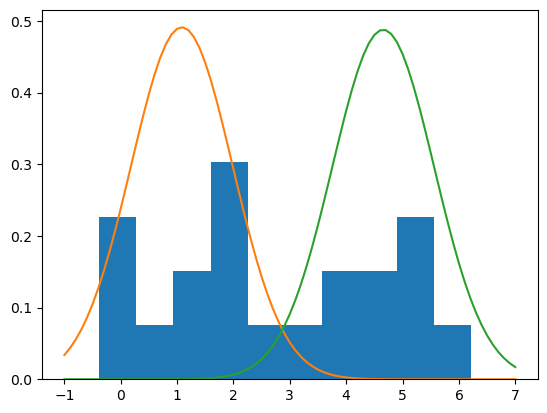

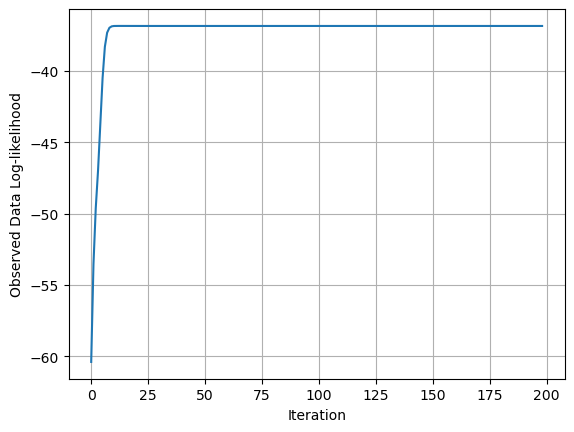

In [1]:
# GMM Code for Univariate Data and K = 2 (Number of Gaussians in Mixture)
import numpy as np
import matplotlib.pyplot as plt

def gauss_dist(x, meu, sigma):
    return (1 / (np.sqrt(2 * np.pi ) * sigma)) * np.exp(-((x - meu) ** 2) / (2 * sigma))

# fmt: off
data = np.array(
    [
        -0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
        0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22
    ]
)
# fmt: on

np.random.seed(42)  # For reproducibility
temp = np.random.permutation(len(data))

piecap = np.zeros(201)
meucap1 = np.zeros(201)
meucap2 = np.zeros(201)
sigmacap1 = np.zeros(201)
sigmacap2 = np.zeros(201)
log_likelihood = np.zeros(201)
responsibilities = np.zeros((201, len(data)))

piecap[0] = 0.5
meucap1[0] = data[temp[0]]
meucap2[0] = data[temp[1]]
sigmacap1[0] = np.var(data)
sigmacap2[0] = np.var(data)

for i in range(200):
    Qq1 = gauss_dist(data, meucap1[i], sigmacap1[i])
    Qq2 = gauss_dist(data, meucap2[i], sigmacap2[i])

    log_likelihood[i] = np.sum(np.log(((1 - piecap[i]) * Qq1) + (piecap[i] * Qq2)))

    responsibilities[i, :] = (piecap[i] * Qq2) / (
        ((1 - piecap[i]) * Qq1) + (piecap[i] * Qq2)
    )

    meucap1[i + 1] = np.sum((1 - responsibilities[i, :]) * data) / np.sum(
        1 - responsibilities[i, :]
    )
    meucap2[i + 1] = np.sum(responsibilities[i, :] * data) / np.sum(
        responsibilities[i, :]
    )

    sigmacap1[i + 1] = np.sum(
        (1 - responsibilities[i, :]) * ((data - meucap1[i]) ** 2)
    ) / np.sum(1 - responsibilities[i, :])
    sigmacap2[i + 1] = np.sum(
        responsibilities[i, :] * ((data - meucap2[i]) ** 2)
    ) / np.sum(responsibilities[i, :])

    piecap[i + 1] = np.sum(responsibilities[i, :]) / len(data)

x = np.arange(-1, 7.1, 0.1)
norm1 = gauss_dist(x, meucap1[-1], sigmacap1[-1])
norm2 = gauss_dist(x, meucap2[-1], sigmacap2[-1])

plt.figure()
plt.hist(data, bins=10, density=True)
plt.plot(x, norm1)
plt.plot(x, norm2)
plt.show()

plt.figure()
plt.plot(log_likelihood[:199])
plt.xlabel("Iteration")
plt.ylabel("Observed Data Log-likelihood")
plt.grid()
plt.show()

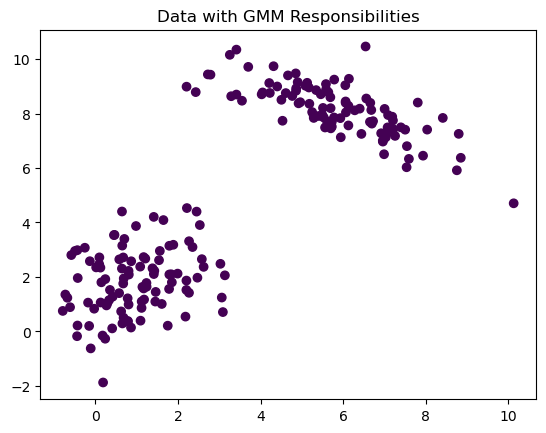

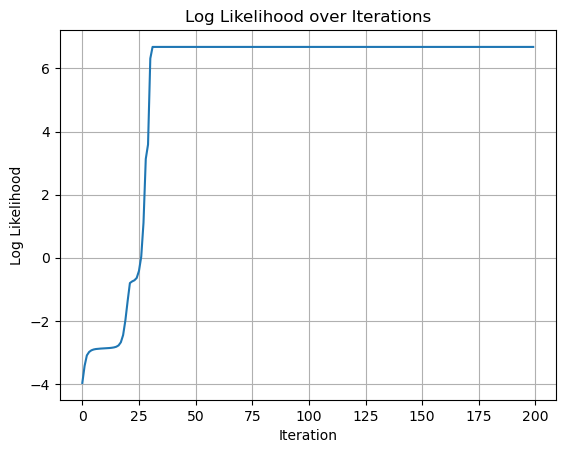

In [9]:
# Generic GMM Code for Multivariate Data With Any data dimension d and Gaussians K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gauss_dist_multivariate(X, mean, cov):
    mvn = multivariate_normal(mean=mean, cov=cov)
    return mvn.pdf(X)

def gmm(X, num_mixtures, max_iter=200):
    num_data, num_features = X.shape

    # Initialize parameters
    np.random.seed(42)
    temp = np.random.permutation(num_data)

    piecap = np.ones((max_iter + 1, num_mixtures)) / num_mixtures
    meucap = np.zeros((max_iter + 1, num_mixtures, num_features))
    sigmacap = np.zeros((max_iter + 1, num_mixtures, num_features, num_features))
    log_likelihood = np.zeros(max_iter + 1)
    responsibilities = np.zeros((max_iter + 1, num_data, num_mixtures))

    for j in range(num_mixtures):
        meucap[0, j, :] = X[temp[j]]
        sigmacap[0, j, :, :] = np.cov(X.T)

    for i in range(max_iter):
        # Expectation Step
        for j in range(num_mixtures):
            responsibilities[i, :, j] = piecap[i, j] * gauss_dist_multivariate(
                X, meucap[i, j, :], sigmacap[i, j, :, :]
            )

        responsibilities[i, :, :] /= np.sum(responsibilities[i, :, :], axis=0)[
            np.newaxis, :
        ]

        # Maximization Step
        for j in range(num_mixtures):
            meucap[i + 1, j, :] = np.sum(
                responsibilities[i, :, j][:, np.newaxis] * X, axis=0
            ) / np.sum(responsibilities[i, :, j])
            diag_reg = 1e-6  # small regularization term
            sigmacap[i + 1, j, :, :] = (
                np.dot(
                    (
                        responsibilities[i, :, j][:, np.newaxis]
                        * (X - meucap[i + 1, j, :])
                    ).T,
                    (X - meucap[i + 1, j, :]),
                )
                + diag_reg * np.eye(num_features)
            ) / np.sum(responsibilities[i, :, j])

            piecap[i + 1, j] = np.sum(responsibilities[i, :, j]) / num_data

        # Compute log likelihood
        log_likelihood[i] = np.sum(
            np.log(
                np.sum(
                    piecap[i + 1, j]
                    * gauss_dist_multivariate(
                        X, meucap[i + 1, j, :], sigmacap[i + 1, j, :, :]
                    ),
                    axis=0,
                )
            )
        )

    return meucap, sigmacap, piecap, log_likelihood, responsibilities


# Generate synthetic multivariate data. Change for d > 2 as you may.
np.random.seed(42)
mean1 = np.array([1, 2])
cov1 = np.array([[1, 0.5], [0.5, 2]])
data1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = np.array([6, 8])
cov2 = np.array([[2, -1], [-1, 1]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

data = np.concatenate((data1, data2), axis=0)

# Apply GMM
num_mixtures = 2
meucap, sigmacap, piecap, log_likelihood, responsibilities = gmm(data, num_mixtures)

# Plot results
plt.figure()
plt.scatter(
    data[:, 0], data[:, 1], c=np.argmax(responsibilities[-1], axis=1), cmap="viridis"
)
plt.title("Data with GMM Responsibilities")
plt.show()

# Plot log likelihood over iterations
plt.figure()
plt.plot(log_likelihood[:200])
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihood over Iterations")
plt.grid()
plt.show()